<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/mnist_fc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#module name : mnist_dl.py
#mnist : 손글씨 인식

from keras.datasets import mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(121)
tf.random.set_seed(121)

In [ ]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label='val_loss')
    plt.legend()
    plt.show()

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() #학습용 문제/답안, 테스트용 문제/답안, 읽어옴, 60000 - 10000 개 나눠져 있음

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape, y_test[:2]) #2개만 출력해봄

(10000, 28, 28) (10000,) [7 2]


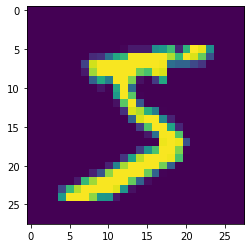

In [ ]:
plt.imshow(X_train[0]) #한장만 보겠음
plt.show()
#print(y_train[0]) #첫번째 사진 정답 출력

In [ ]:
#Sequential안에 모델을 하나하나 쌓아야함
from keras.models import Sequential
#층별로 쌓음
from keras.layers import Dense

In [ ]:
#X_train (60000, 28, 28) -> 60000 * 784
#이미지 스케일링
# /255 : 255로 나눠서 스케일링 한 것(이미지스케일링 시에는 255로 나눈다고 봄)
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255 #X_train.shape[0]: 행 가져오기 #int로 바꿀거 아니면 굳이 float을 astype할 필욘 없다 #.astype('int32')
#X_test (10000, 28, 28) -> 10000 * 784
X_test = X_test.reshape(X_test.shape[0], 784) / 255
#print(X_train[0]) #첫번째 사진 출력 (784개의 픽셀 가지고 있음) - 이미지 스케일링은 최고 픽셀값 256(0~256 픽셀컬러)으로 나누면 됨 (최대값은 1, 나머지는 0.x. 0~1사이에 값이 들어오게 됨)
#MinMaxScaler도 가능하지만 이미지는 255로 나누는게 낫다

In [ ]:
model =Sequential()     #input_dim -->  reshape시 사용한 28*28
model.add(Dense(64, input_dim=28*28, activation='relu')) #몇개로 내보낼지는 마음대로/ input_dim : 28*28=784 -> X_train이 (60000, 28, 28)이므로 60000 * 784로 reshape 해야함
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax')) #0~9까지 손글씨 이므로 출력:10
print(model.summary()) #Total params: 53,018 원래는 dense 더 깊게 줘야하는데 얕게 줘서 이런 결과 나옴. ->  원래는 cnn보다 fullconnection의 경우 totalparams 기하급수적으로 증가

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', #정수기에 sparse
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
                                                     #batch_size : 한번 올릴떄마다 올라가는 숫자,
history = model.fit(X_train, y_train, epochs = 100, batch_size=300, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0) #verbose=0으로 하면 로그 안찍히지만 돌아가는지 확인 어려울 수 있음
#Overfitting 발생(주황색선이 더이상 증가하지 않으면 스탑시켜야함) -> epoch 12번 정도가 적당? #학습은 하면 할수록 0으로 가까워짐 -> overfitting(학습만 잘되고 그 이외 데이터 못맞춤)

In [ ]:
print('acc: {:.4f}, loss: {:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

313/313 [==============================] - 0s 977us/step - loss: 0.1146 - accuracy: 0.9723
acc: 0.9723, loss: 0.1146


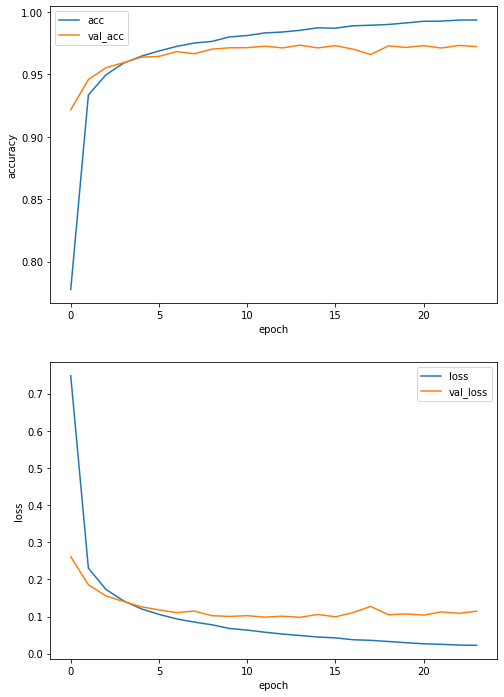

In [ ]:
CHART_PLOT_HISTORY(history)